In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Regression

## Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#loading the data
df = pd.read_csv("/content/drive/MyDrive/CS_210HW3/loans.csv")

#dropping the irrelevant column
# ID is not that important
data_GENERAL = df.drop("ID", axis=1)

# I think unnamed also not important because we do not know what it means. (Probably price)
data_GENERAL = data_GENERAL.drop("Unnamed: 0", axis=1)

#check each feature for missing values and handle them

missing_values = data_GENERAL.isnull().sum()
features_with_missing_values = missing_values[missing_values > 0].index

for feature in features_with_missing_values:
    data_GENERAL[feature].fillna(data_GENERAL[feature].mode()[0], inplace=True)
    print("Filled missing values for", feature, "mode:", data_GENERAL[feature].mode()[0])

# Also, set df as general as well to use in future
df = data_GENERAL

#checking num_duplicates
num_duplicates = data_GENERAL.duplicated().sum()
print("Number of duplicates:", num_duplicates)

Filled missing values for Loan_Length mode: 36.0
Filled missing values for Loan_Purpose mode: debt_consolidation
Filled missing values for Employment_Length mode: 10.0
Number of duplicates: 0


## Exploratory Data Analysis

Visualize the the interest rates corresponding to different Home_Ownership and Loan_Length parameters.


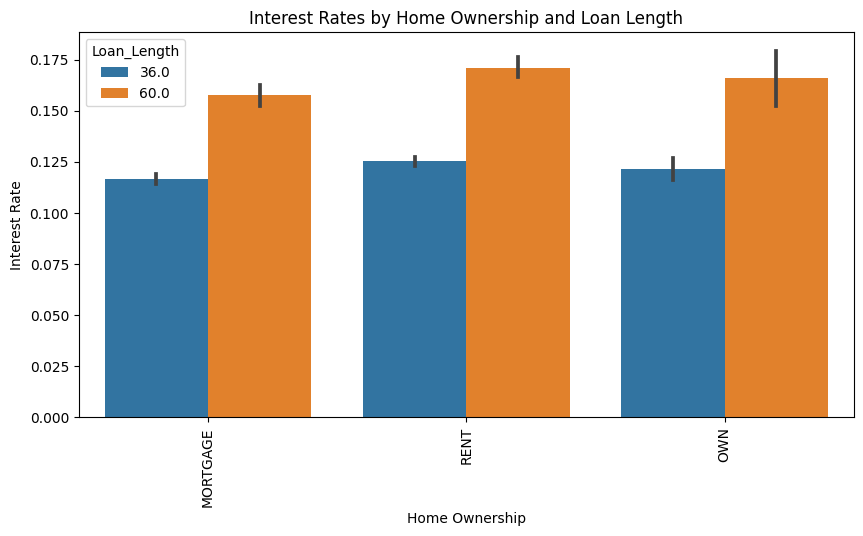

In [ ]:
# Drop irrelevants
data = df.drop(columns=['Amount_Requested', 'Amount_Funded_By_Investors',
                          'Loan_Purpose', 'Debt_To_Income_Ratio',
                          'Monthly_Income', 'Open_CREDIT_Lines',
                          'Revolving_CREDIT_Balance', 'Inquiries_in_the_Last_6_Months',
                          'Employment_Length'])

# Handle missing values
data = data.dropna()

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 5))

# Create the bar plot
sns.barplot(x='Home_Ownership', y='Interest_Rate', hue='Loan_Length', data=data, ax=ax)

# Add label and title
ax.set_xlabel('Home Ownership')
ax.set_ylabel('Interest Rate')
ax.set_title('Interest Rates by Home Ownership and Loan Length')

plt.xticks(rotation=90)

plt.show()

Create a pie plot to demonstrate the share of distribution in home ownership.

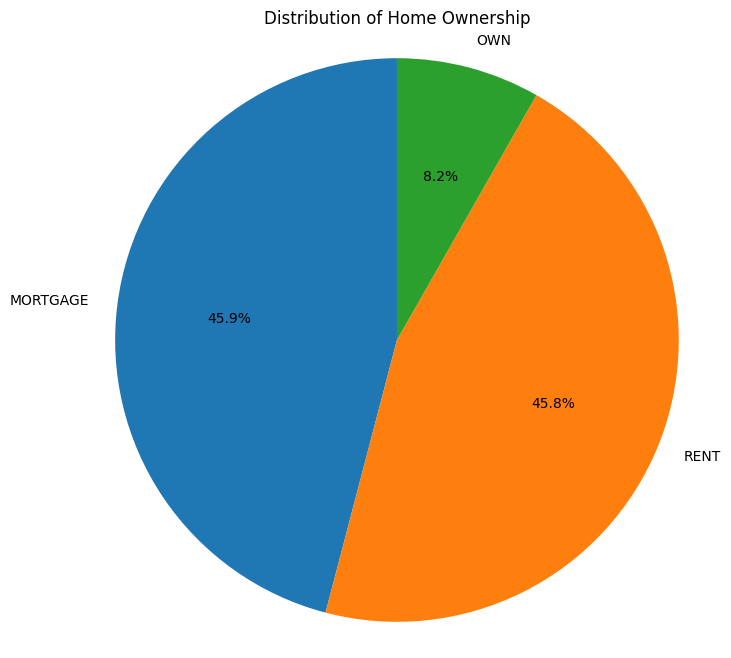

In [ ]:
# Count number of occurrences for each ownership
ownership_counts = df['Home_Ownership'].value_counts()

# Create figure and axes
fig, ax = plt.subplots(figsize=(8, 8))

# Create the pie plot
ax.pie(ownership_counts, labels=ownership_counts.index, autopct='%1.1f%%', startangle=90)

ax.set_title('Distribution of Home Ownership')

# Equal aspect ratio to make sure it drawn as a circle
ax.axis('equal')

plt.show()

Check the data types for each feature and convert the categorical features into numerical values.

**Hint:** You can use the "get_dummies" function of Pandas library.

In [ ]:
df.dtypes

Amount_Requested                    int64
Amount_Funded_By_Investors        float64
Interest_Rate                     float64
Loan_Length                       float64
Loan_Purpose                       object
Debt_To_Income_Ratio              float64
Home_Ownership                     object
Monthly_Income                    float64
Open_CREDIT_Lines                   int64
Revolving_CREDIT_Balance            int64
Inquiries_in_the_Last_6_Months      int64
Employment_Length                 float64
dtype: object

In [ ]:
# Check the data types
print(df.dtypes)

# Convert categorical features into numerical values
categorical_features = ['Home_Ownership', 'Loan_Purpose']

data_encoded = pd.get_dummies(df, columns=categorical_features)

# Display updated data with numerical values for categorical features
print(data_encoded.head())

Amount_Requested                    int64
Amount_Funded_By_Investors        float64
Interest_Rate                     float64
Loan_Length                       float64
Loan_Purpose                       object
Debt_To_Income_Ratio              float64
Home_Ownership                     object
Monthly_Income                    float64
Open_CREDIT_Lines                   int64
Revolving_CREDIT_Balance            int64
Inquiries_in_the_Last_6_Months      int64
Employment_Length                 float64
dtype: object
   Amount_Requested  Amount_Funded_By_Investors  Interest_Rate  Loan_Length  \
0             20000                     20000.0           0.09         36.0   
1             19200                     19200.0           0.12         36.0   
2             35000                     35000.0           0.22         60.0   
3             10000                      9975.0           0.10         36.0   
4             12000                     12000.0           0.12         36.0   

   Debt

Create a heatmap to present the relationships between different features.

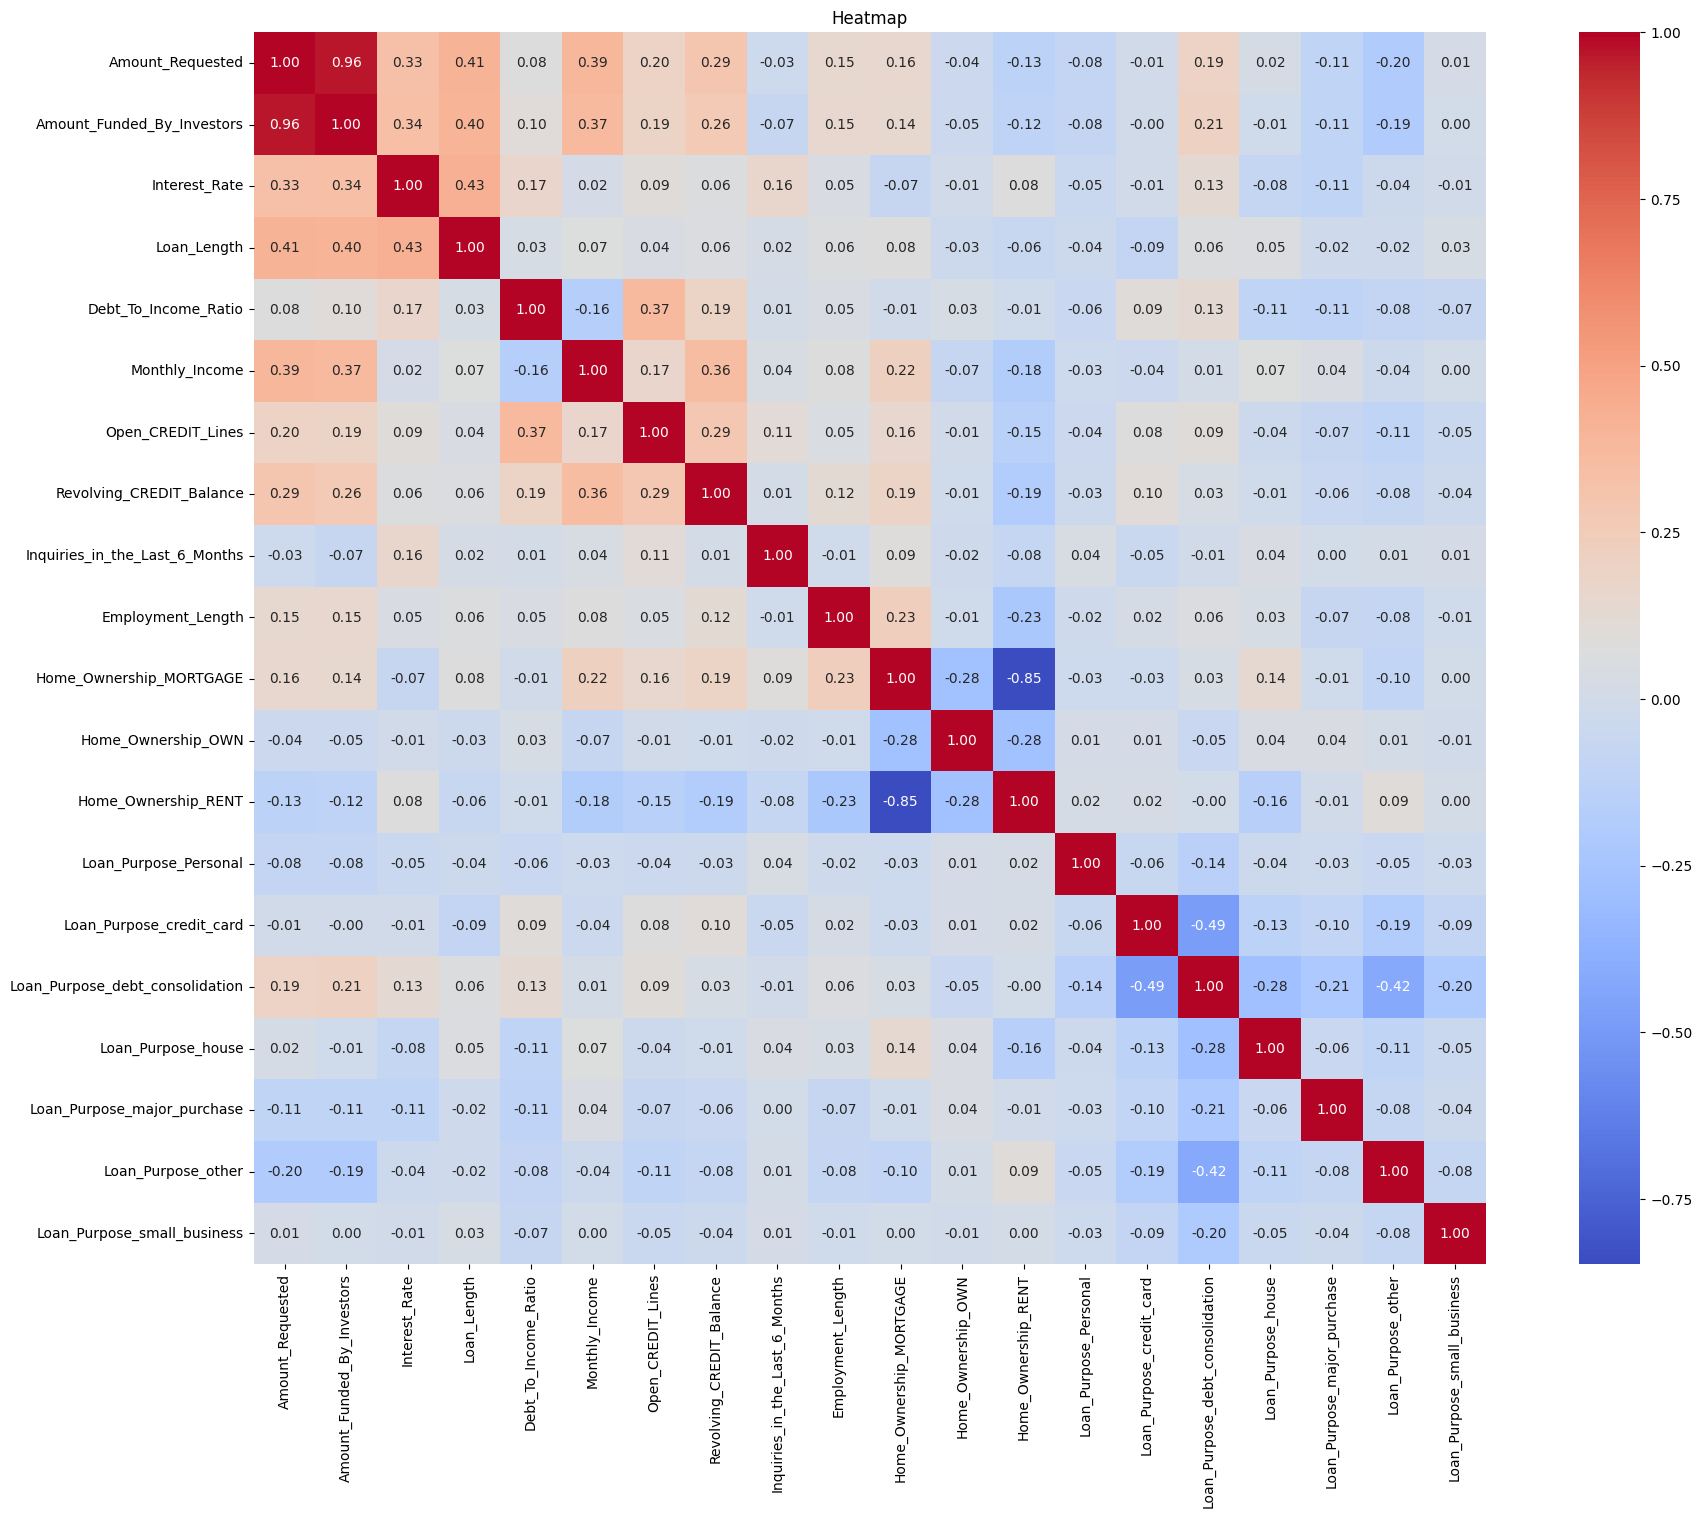

In [ ]:
# Calculate the correlation matrix
corr_matrix = data_encoded.corr()

# Create the heatmap
plt.figure(figsize=(24, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

plt.title('Heatmap')

plt.xticks(rotation=90)

plt.show()

## Model Evaluation

Separate the data into features and labels.



In [ ]:
#seperate the data into features and labels

# I think Amount_Requested, Amount_Funded_By_Investors, Loan_Length, Loan_Purpose, Debt_To_Income_Ratio
# Home_Ownership, Monthly_Income, Open_CREDIT_Lines, Revolving_CREDIT_Balance, Inquiries_in_the_Last_6_Months, Employment_Length
# should be features while interest rates are label

data = data_encoded
# Separate features and labels
features = data.drop('Interest_Rate', axis=1)
labels = data['Interest_Rate']

# Print the features and labels
print("Features:")
print(features.head())
print("\nLabels:")
print(labels.head())

Features:
   Amount_Requested  Amount_Funded_By_Investors  Loan_Length  \
0             20000                     20000.0         36.0   
1             19200                     19200.0         36.0   
2             35000                     35000.0         60.0   
3             10000                      9975.0         36.0   
4             12000                     12000.0         36.0   

   Debt_To_Income_Ratio  Monthly_Income  Open_CREDIT_Lines  \
0                  0.15         6541.67                 14   
1                  0.28         4583.33                 12   
2                  0.24        11500.00                 14   
3                  0.14         3833.33                 10   
4                  0.19         3195.00                 11   

   Revolving_CREDIT_Balance  Inquiries_in_the_Last_6_Months  \
0                     14272                               2   
1                     11140                               1   
2                     21977                

Split the data into training and test data.


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Training set - Features:", X_train.shape)
print("Training set - Labels:", y_train.shape)
print("Test set - Features:", X_test.shape)
print("Test set - Labels:", y_test.shape)

Training set - Features: (2000, 19)
Training set - Labels: (2000,)
Test set - Features: (500, 19)
Test set - Labels: (500,)


Train a linear regression model on and report the MSE and R2 score on the training data.

In [ ]:
# Train a linear regression model and predict

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()

# Train
model.fit(X_train, y_train)

# Make prediction
train_predictions = model.predict(X_train)

# Calculate the Mean Squared Error (MSE) and R2 score on training data
mse = mean_squared_error(y_train, train_predictions)
r2 = r2_score(y_train, train_predictions)

# Print the MSE and R2 score on training data
print("MSE on training data:", mse)
print("R2 score on training data:", r2)

MSE on training data: 0.0011820393300735425
R2 score on training data: 0.3008687702490982


Run the model on test data and report the MSE and R2 score.

In [ ]:
# Predict the target variable on the test data
test_predictions = model.predict(X_test)

# Calculate the Mean Squared Error (MSE) and R2 score on the test data
mse_test = mean_squared_error(y_test, test_predictions)

# Calculate R2
r2_test = r2_score(y_test, test_predictions)

# Print the MSE and R2 score on the test data
print("MSE on test data:", mse_test)
print("R2 score on test data:", r2_test)

MSE on test data: 0.0012657470603894474
R2 score on test data: 0.2793678916504706


# Experiment with Different Regression Models

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Retrieve linear regressor metrics to print later on

linear_train_predictions = model.predict(X_train)
linear_test_predictions = model.predict(X_test)
linear_train_mse = mean_squared_error(y_train, linear_train_predictions)
linear_train_r2 = r2_score(y_train, linear_train_predictions)
linear_test_mse = mean_squared_error(y_test, linear_test_predictions)
linear_test_r2 = r2_score(y_test, linear_test_predictions)

# Polynomial Regression or some other model

poly_model = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(), LinearRegression())
poly_model.fit(X_train, y_train)
poly_train_predictions = poly_model.predict(X_train)
poly_test_predictions = poly_model.predict(X_test)
poly_train_mse = mean_squared_error(y_train, poly_train_predictions)
poly_train_r2 = r2_score(y_train, poly_train_predictions)
poly_test_mse = mean_squared_error(y_test, poly_test_predictions)
poly_test_r2 = r2_score(y_test, poly_test_predictions)

# SVR
svr_model = make_pipeline(StandardScaler(), SVR())
svr_model.fit(X_train, y_train)
svr_train_predictions = svr_model.predict(X_train)
svr_test_predictions = svr_model.predict(X_test)
svr_train_mse = mean_squared_error(y_train, svr_train_predictions)
svr_train_r2 = r2_score(y_train, svr_train_predictions)
svr_test_mse = mean_squared_error(y_test, svr_test_predictions)
svr_test_r2 = r2_score(y_test, svr_test_predictions)

from sklearn.ensemble import GradientBoostingRegressor
# Gradient Boosting Regression
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_train_predictions = gb_model.predict(X_train)
gb_test_predictions = gb_model.predict(X_test)
gb_train_mse = mean_squared_error(y_train, gb_train_predictions)
gb_train_r2 = r2_score(y_train, gb_train_predictions)
gb_test_mse = mean_squared_error(y_test, gb_test_predictions)
gb_test_r2 = r2_score(y_test, gb_test_predictions)

# Print the results
print("Linear Regression:")
print("Train MSE:", linear_train_mse)
print("Train R2 score:", linear_train_r2)
print("Test MSE:", linear_test_mse)
print("Test R2 score:", linear_test_r2)

print("\nPolynomial Regression:")
print("Train MSE:", poly_train_mse)
print("Train R2 score:", poly_train_r2)
print("Test MSE:", poly_test_mse)
print("Test R2 score:", poly_test_r2)

print("\nSupport Vector Regression - SVR:")
print("Train MSE:", svr_train_mse)
print("Train R2 score:", svr_train_r2)
print("Test MSE:", svr_test_mse)
print("Test R2 score:", svr_test_r2)

print("\nGradient Boosting Regression:")
print("Train MSE:", gb_train_mse)
print("Train R2 score:", gb_train_r2)
print("Test MSE:", gb_test_mse)
print("Test R2 score:", gb_test_r2)

Linear Regression:
Train MSE: 0.0011820393300735425
Train R2 score: 0.3008687702490982
Test MSE: 0.0012657470603894474
Test R2 score: 0.2793678916504706

Polynomial Regression:
Train MSE: 0.00103029127284552
Train R2 score: 0.3906219647181324
Test MSE: 0.0015395981753600228
Test R2 score: 0.12345529858120818

Support Vector Regression - SVR:
Train MSE: 0.0020969500000000006
Train R2 score: -0.24026603424011417
Test MSE: 0.0020592000000000006
Test R2 score: -0.17237138757942239

Gradient Boosting Regression:
Train MSE: 0.0008653252282498858
Train R2 score: 0.48819309512892195
Test MSE: 0.0012352079432706763
Test R2 score: 0.296754831778668


# Classification

Classification is a fundamental task in machine learning that is often used in conjunction with regression. The goal of a classification task is to train a machine learning algorithm to accurately assign a given set of features to the correct class. There are various types of classification tasks, such as image classification, text classification, and audio classification etc.

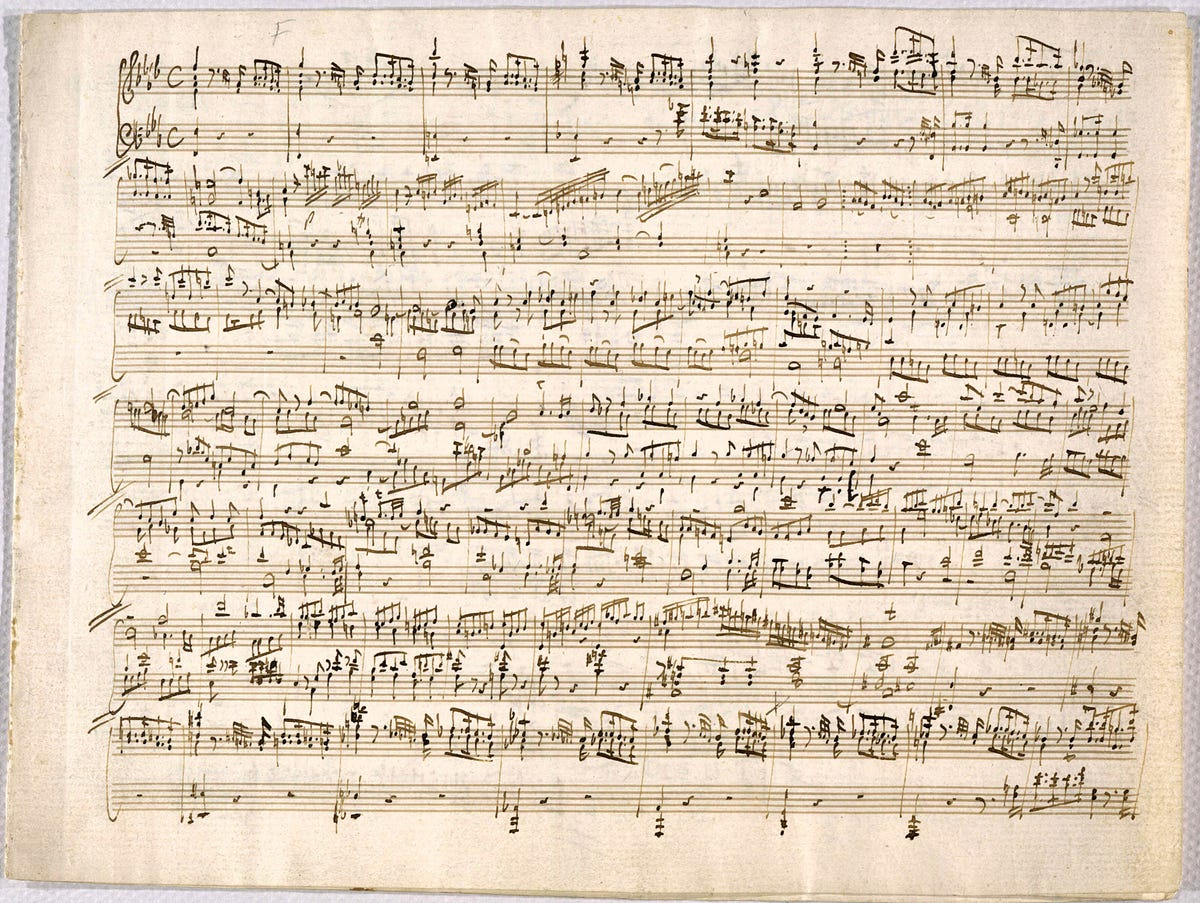

In this section, we are going to build and train a model which can figure out the composer from the notes and velocities that are in the song. These values are stored inside midi files.

In [ ]:
!pip install pretty_midi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 52.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 7.2 MB/s eta 0:00:00
  Created wheel for pretty_midi: filename=pretty_midi-0.2.10-py3-none-any.whl size=5592289 sha256=4fa304fdbc5b4f1ed7c7b13cd487f6132d1eaa34ae16565b0a344b6dd48aae31
  Stored in directory: /root/.cache/pip/wheels/cd/a5/30/7b8b7f58709f5150f67f98fde4b891ebf0be9ef07a8af49f25
Successfully built pretty_midi


In [ ]:
import pretty_midi
import numpy as np
import os
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def extractNotesAndVelocities(path):
    # Reading the midi file
    midi_data = pretty_midi.PrettyMIDI(path)

    notes = np.array([])
    velocities = np.array([])

    # Extracting pitch and velocity values of each song
    for instrument in midi_data.instruments:
      notes = np.append(notes, np.array([note.pitch for note in instrument.notes]))
      velocities = np.append(velocities, np.array([note.velocity for note in instrument.notes]))

    return notes, velocities

## Data Loading

In [ ]:
def createComposersDictionary(root_path):
  composers = {}

  # Extract notes and velocities of each song and
  # store them in a dictionary with composer names as keys
  # Write a code to bypass corrupted files and print the filenames of the corrupted files

  for dirpath, dirnames, filenames in os.walk(root_path):
      for filename in filenames:
          # Check if a file has a .mid or .midi extension
          if filename.endswith('.mid') or filename.endswith('.midi'):
              file_path = os.path.join(dirpath, filename)
              try:
                  # Extract notes and velocities
                  notes, velocities = extractNotesAndVelocities(file_path)

                  # Get composer name
                  composer = os.path.basename(dirpath)

                  # Add notes and velocities to the composer's entry
                  if composer not in composers:
                      composers[composer] = {'notes': [], 'velocities': []}
                  composers[composer]['notes'].extend(notes)
                  composers[composer]['velocities'].extend(velocities)

              except Exception as e:
                  # Check exceptions
                  print(f"Error processing file: {file_path}")
  ########################
  return composers

path = "/content/drive/MyDrive/CS_210HW3/musicnet_midis"
composers = createComposersDictionary(path)

Error processing file: /content/drive/MyDrive/CS_210HW3/musicnet_midis/Bach/2310_prelude15.mid
Error processing file: /content/drive/MyDrive/CS_210HW3/musicnet_midis/Bach/2227_fugue6.mid
Error processing file: /content/drive/MyDrive/CS_210HW3/musicnet_midis/Bach/2292_prelude19.mid
Error processing file: /content/drive/MyDrive/CS_210HW3/musicnet_midis/Bach/2211_fugue12.mid
Error processing file: /content/drive/MyDrive/CS_210HW3/musicnet_midis/Bach/2230_prelude20.mid
Error processing file: /content/drive/MyDrive/CS_210HW3/musicnet_midis/Bach/2194_prelude13.mid
Error processing file: /content/drive/MyDrive/CS_210HW3/musicnet_midis/Bach/2305_prelude14.mid


## Mapping Name to Index

Since the machine learning solutions only understand numeric values we need to create a mapping from names of the composers to numbers.

In [ ]:
composer_name_to_index = {composer: index for index, composer in enumerate(list(composers.keys()))}

In [ ]:
composer_name_to_index

{'Bach': 0, 'Mozart': 1, 'Schubert': 2, 'Beethoven': 3}

## Data Preprocessing

The machine learning algorithms work by using fixed sized inputs and outputs and songs have different numbers of notes, therefore we need to put them inside a fixed sized of vectors. Fixed size will be 400!!!

Scikit-learn only has shallow machine learning algorithms, thus you can use flatten() function to convert the numpy array of notes and velocities to 1d vector.



In [ ]:
fixed_size = 400 # Fixed size of features

labels = [] # Store the labels in this list
features = [] # Store the features as 2d(number of elements, fixed size) arrays in this list
notes = [] # Store the average pitch of each fixed sized array in this list for visualization
velocities = [] # Store the average velocity if each fixed sized array in this list for visualization

for composer, notes_and_velocities in composers.items():
  for i in range(len(notes_and_velocities)):
    # Extract notes and velocities
    notes_array = np.array(notes_and_velocities['notes'])
    velocities_array = np.array(notes_and_velocities['velocities'])
    # Bypass the songs with less than 400 notes
    if len(notes_array) < fixed_size:
        continue

    # Extract then store the !!average!! notes and velocities of each 400 fixed sized vectors
    num_segments = len(notes_array) // fixed_size
    for j in range(num_segments):
        start_index = j * fixed_size
        end_index = start_index + fixed_size

        avg_notes = np.mean(notes_array[start_index:end_index])
        avg_velocities = np.mean(velocities_array[start_index:end_index])
    # Extract then store the composer names of each 400 sized vectors
        labels.append(composer)
    # Extract then store the features(notes and velocities) of each 400 sized vectors
    # do not forget to flatten the array before storing
        features.append(np.concatenate((notes_array[start_index:end_index].flatten(),
                                       velocities_array[start_index:end_index].flatten())))

        notes.append(avg_notes)
        velocities.append(avg_velocities)
    ########################

labels = np.array(labels)
features = np.array(features)
notes = np.array(notes)
velocities = np.array(velocities)

# Data Visualization

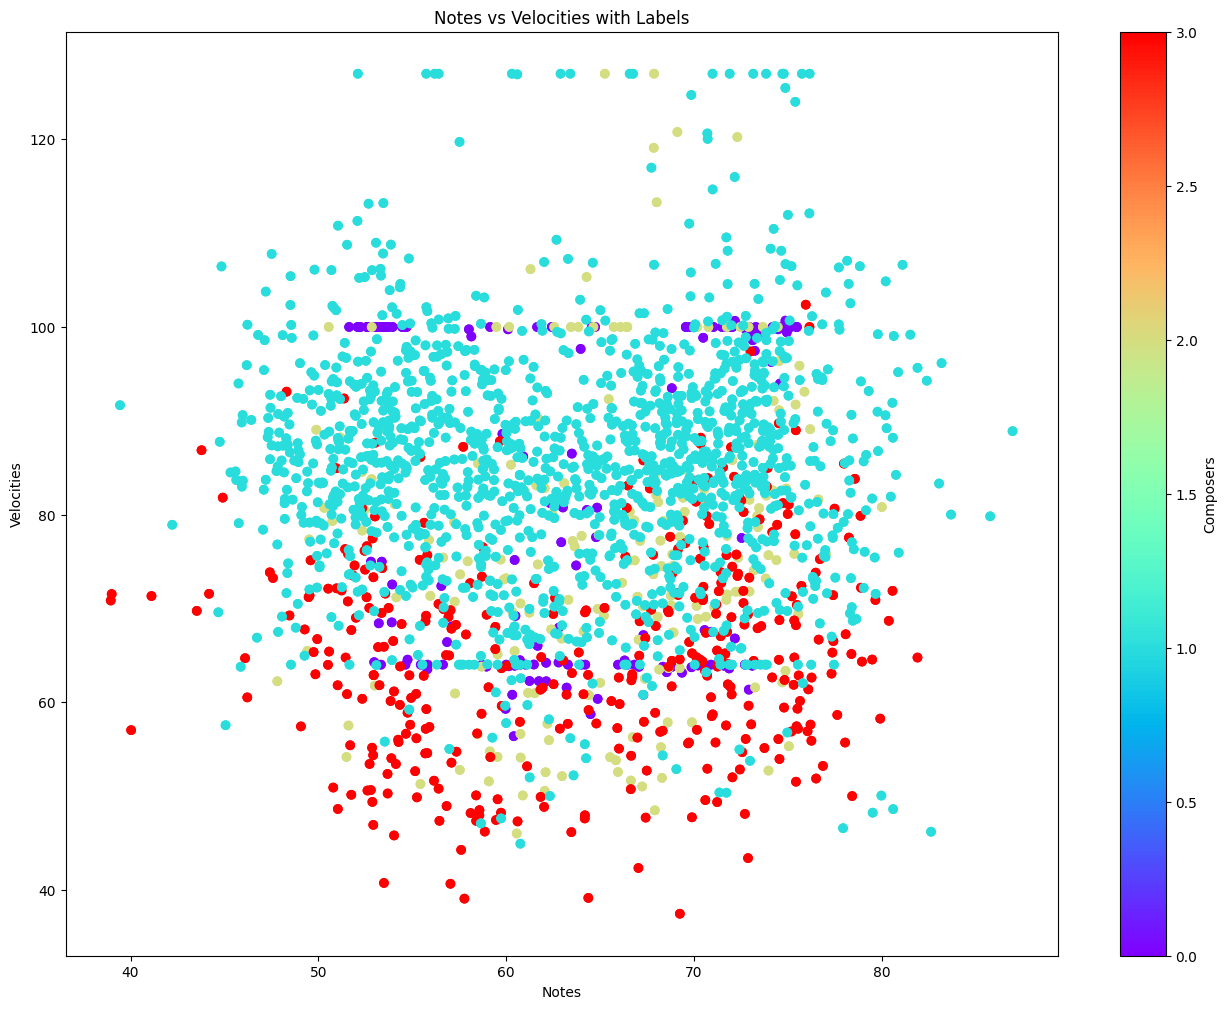

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Convert composer labels to numeric values
label_encoder = LabelEncoder()
label_encoder.fit(labels)
numeric_labels = label_encoder.transform(labels)

# Create a figure
fig = plt.figure(figsize=(16, 12))

# Plot scatter plot using notes and velocities, with labels as color
plt.scatter(notes, velocities, c=numeric_labels, cmap='rainbow')

# Set x-label, y-label, and title
plt.xlabel('Notes')
plt.ylabel('Velocities')
plt.title('Notes vs Velocities with Labels')

cbar = plt.colorbar()
cbar.set_label('Composers')

plt.show()


## Checking lengths

Check whether the lengths of features and labels are the same or not.

In [ ]:
if len(features) == len(labels):
    print("The lengths of features and labels are the same.")
else:
    print("The lengths of features and labels are different.")

The lengths of features and labels are the same.


## Train-test split

Split the features and labels into train and test datasets using sklearn with test size of 0.2

In [ ]:
# Split the data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Print the shapes of the train and test datasets
print("Train dataset - Features shape:", X_train.shape)
print("Train dataset - Labels shape:", y_train.shape)
print("Test dataset - Features shape:", X_test.shape)
print("Test dataset - Labels shape:", y_test.shape)

Train dataset - Features shape: (3408, 800)
Train dataset - Labels shape: (3408,)
Test dataset - Features shape: (852, 800)
Test dataset - Labels shape: (852,)


## Choosing and training a model

In [ ]:

'''
I decided to use Random Forest because we have 3 dimensional data which this
algorithm can handle easily. Our data consist of Notes and Velocities (2 numerical),
Names of artist (1 categorical). It is known that Random Forest has capacity to
figure both numerical features and categorical features. That is why I believe
it is perfect match for our model. In addition, Random Forest has robustness against
overfitting; which means it will be take  average to block overfitting that might
happen in single decision tree. So, we will not need to worry about overfitting as well.

'''

from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Train the classifier on the train dataset
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

## Model Evaluation

Predict on test features and use f1_score to evaluate your model.

In [ ]:
from sklearn.metrics import f1_score

# Predict on the test features
y_pred = rf_classifier.predict(X_test)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

print("F1 score:", f1)


F1 score: 0.9615061284208002
